In [1]:
import sys
import os
sys.path.append('..')
from crawler.crawler import PttCrawlerMongoDB

db = PttCrawlerMongoDB(only_connect_db=True)

In [2]:
import pandas as pd
import numpy as np

# 5/2 - 5/20
articles = list(db.find('article', {}))
total = pd.DataFrame(articles)
# total.to_json('Gossiping.json')
# total['len_comment'] = [len(it) for it in total['comment']]
# total = total.drop('_id', axis=1)
# total.head()


In [3]:
total = total.dropna(axis=0)
# df[df['board'] != 'Gossiping']
total['len_comment'] = [len(it) for it in total['comment']]


,_id,author,board,category,comment,date,img_link,ip_author,score,text,title,url,len_comment
0,5cf9d39432f5835fcd39ef28,clkdtm32,Gossiping,新聞,"[{'tag': '推', 'user': 'SidMax', 'text': '為什麼不挺...",2019-05-06 22:50:06,[],118.165.112.72,-163,\n1.媒體來源:\n ※ 例如蘋果日報、自由時報（請參考版規下方的核准媒體名單）\n 三...,[新聞] 連勝文挺自經區：洗產地不是更顯MIT比MIC,https://www.ptt.cc/bbs/Gossiping/M.1557154216....,306
1,5cf9d3a432f5835fcd39ef69,kiyoe,Gossiping,問卦,"[{'tag': '噓', 'user': 'abiese05', 'text': '太長'...",2019-05-06 23:06:21,"[https://i.imgur.com/yAHrT4X.jpg, https://i.im...",125.231.166.175,-6,\n有一名員警在臉書上分享\n\n某日騎著警用機車在台中市路上巡邏\n\n這時一台福特貨車...,[問卦] 貨車疑似對警用機車逼車 慘遭警察攔下吃上900元罰單,https://www.ptt.cc/bbs/Gossiping/M.1557155187....,7
2,5cf9d3a632f5835fcd39ef72,songgood,Gossiping,新聞,"[{'tag': '→', 'user': 'syldsk', 'text': '國道是要競...",2019-05-06 23:06:04,[http://i.imgur.com/EGsPark.jpg],59.115.238.251,-1,\n1.媒體來源:\nyahoo tvbs\n\n2.記者署名\n莊祖銘 趙立\n\n3....,[新聞] TSF台灣大賽重機組 下雨打滑驚險摔車,https://www.ptt.cc/bbs/Gossiping/M.1557155169....,5
3,5cf9d3a832f5835fcd39ef78,words2012,Gossiping,Re,"[{'tag': '→', 'user': 'peterwww', 'text': '真議題...",2019-05-06 23:05:23,[],118.167.188.11,1,\n假議題啦\n\n柯文哲的意思是\n\n我國早就獨立了\n\n為何要在統獨上內耗\n\n...,Re: [問卦] 統獨 對你而言是不是假議題？,https://www.ptt.cc/bbs/Gossiping/M.1557155125....,6
4,5cf9d3ab32f5835fcd39ef7d,archie403,Gossiping,問卦,"[{'tag': '推', 'user': 'AustinRivers', 'text': ...",2019-05-06 23:04:51,[],39.10.136.95,5,\n發明一個東西最難的應該就是構思了吧\n\n阿既然鋼鐵裝這概念都出來十幾年了\n\n也在...,[問卦] 什麼時候可以做出鋼鐵裝,https://www.ptt.cc/bbs/Gossiping/M.1557155093....,17
5,5cf9d3ae32f5835fcd39ef8d,miler22020,Gossiping,Re,"[{'tag': '噓', 'user': 'waijr', 'text': '因為立委有分...",2019-05-06 23:04:02,[],223.137.18.128,4,\n其實重點是\n\n立委提名，也是打市話\n\n怎麼遇到某個辣台妹，就吵著要打手機\n\...,Re: [新聞] 蔡提民調納手機 游盈隆：輸不起、耍無賴,https://www.ptt.cc/bbs/Gossiping/M.1557155044....,26
6,5cf9d3b132f5835fcd39efa0,hithaman,Gossiping,爆卦,"[{'tag': '→', 'user': 'YqYq5566', 'text': '', ...",2019-05-06 23:03:49,[],36.232.46.9,8,\n此段訪談的上一篇：\n https://www.ptt.cc/bbs/Gossipin...,[爆卦] 190429 新聞面對面 柯文哲專訪逐字稿-4,https://www.ptt.cc/bbs/Gossiping/M.1557155031....,17
7,5cf9d3b332f5835fcd39efb0,SaintSeven,Gossiping,問卦,"[{'tag': '推', 'user': 'laider', 'text': '有決定要交...",2019-05-06 23:02:01,"[http://i.imgur.com/b9dxpKM.jpg, http://i.imgu...",42.77.138.0,-1,\n\n像標題\n\n聖誕樹最早都就地取材，以各種衫樹松樹為材料進行裝飾。后來多以pvc製...,[問卦] 沒有燈飾的聖誕樹還會有蘿莉喜歡嗎,https://www.ptt.cc/bbs/Gossiping/M.1557154930....,10
8,5cf9d3b532f5835fcd39efbb,Lo78,Gossiping,新聞,"[{'tag': '→', 'user': 'pinhanpaul', 'text': '別...",2019-05-06 23:01:01,[],111.252.12.155,3,\n自由 娛樂新聞\n\n記者林南谷\n\n\n「彭文正失業了」 李晶玉：別失志就好\n\...,[新聞] 「彭文正失業了」 李晶玉：別失志就好,https://www.ptt.cc/bbs/Gossiping/M.1557154863....,46
9,5cf9d3b832f5835fcd39efe2,GuoJia,Gossiping,問卦,"[{'tag': '→', 'user': 'ericthree', 'text': '你有...",2019-05-06 23:00:41,[],66.171.116.201,1,\n https://www.fmprc.gov.cn/web/fyrbt_673021/...,[問卦] 有關部門是什麼,https://www.ptt.cc/bbs/Gossiping/M.1557154849....,5


-24.5 67.5


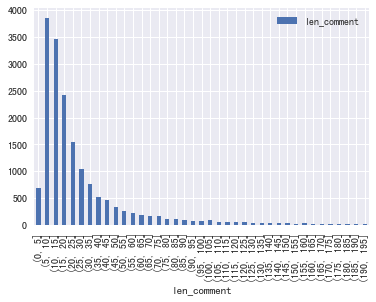

In [46]:
# 篩出離群職
# 被積極討論的文章：50% 前
q1 = total['len_comment'].quantile(0.25)
q3 = total['len_comment'].quantile(0.75)
iqr = q3 - q1
mask1 = total['len_comment'] > (q1 - 1.5 * iqr)
mask2 = total['len_comment'] < (q3 + 1.5 * iqr)

print(q1 - 1.5 * iqr, q3 + 1.5 * iqr)
hot = total

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 20))

com_sec = list(range(0, 200, 5))
com = pd.cut(hot['len_comment'], com_sec)
score_piv_board = hot.pivot_table('len_comment', [com], aggfunc='count').dropna(axis=0, how='all').fillna(0, axis=0)
score_piv_board.plot(kind='bar')

In [47]:
mask1 = hot['len_comment'] > hot['len_comment'].quantile(0.5)
mask2 = hot['len_comment'] > hot['len_comment'].mean()
hot = hot[mask1]
print(hot['len_comment'].quantile(0.5), hot['len_comment'].mean())

34.0 73.61535003933027


In [48]:
len(hot)

8899

In [49]:
import jieba as jb
import jieba.posseg as pseg

# pseg.set_dictionary('./dict/dict.txt')
jb.set_dictionary('./dict/dict.txt')
jb.load_userdict('./dict/ptt_dict.txt')
jb.enable_parallel(4)

stop_word = set()
with open('./dict/ptt_stop_word.txt', 'r') as f:
    for line in f.readlines():
        stop_word.add(line.strip())

cut_text = []
cut_flag = []
for i, text in enumerate(hot['text']):
    flag = []
    word = []
    if i % 1000 == 0:
        print(i)
    for w in pseg.cut(text):
        if w.word.strip() and w.word.strip() not in stop_word:
            flag.append(w.flag)
            word.append(w.word)
    cut_text.append(word)
    cut_flag.append(flag)
#     cut_text.append([w.word.strip() for w in pseg.cut(text) if w.word.strip() and w.flag in ('N', 'n') and w.word.strip() not in stop_word])
hot['cut_text'] = cut_text
hot['cut_flag'] = cut_flag
# hot.to_json('gossiping_filtered.json', encoding='utf-8')

Building prefix dict from /Users/apple/GoogleDrive/statistics/dict/dict.txt ...
Loading model from cache /tmp/jieba.u5cf2d085ed4dce97017283a1c0b9d56c.cache
Loading model cost 0.752 seconds.
Prefix dict has been built succesfully.


0
1000
2000
3000
4000
5000
6000
7000
8000


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Process ForkPoolWorker-7:
Process ForkPoolWorker-5:
Process ForkPoolWorker-4:
Process ForkPoolWorker-6:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstra

In [50]:
from gensim.corpora.dictionary import Dictionary


def get_dict(text):
    word_dic = Dictionary(text)
#     word_dic.filter_extremes()
#     word_dic.filter_n_most_frequent(0)
    word_dic.compactify()
#     print(word_dic.get(1, -1))
    return word_dic


# mask = total['len_comment'] > 5
# group = total[mask].groupby('board')
# hot = pd.read_csv('gossiping_filtered.csv', encoding='utf8')
article = []
for text, flag in zip(hot['cut_text'], hot['cut_flag']):
    tmp = []
    for t, j in zip(text, flag):
        tmp.append(t + '/' + j)
    article.append(tmp)

word_dic = get_dict(article)
tmp = []

for text in hot['cut_text']:
    tmp.append([ word_dic.token2id.get(w[0], -1) for w in text ])
hot['id_text'] = tmp

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [51]:
dic = pd.Series(sorted(word_dic.dfs.items(), key=lambda kv: kv[1]))
dic = [(word_dic.get(w[0]), w[1]) for w in dic if 'n' in word_dic.get(w[0]).split('/')[1]]
dic = [w for w in dic if w[0].split('/')[1] != 'eng']
# dic[::-1]

In [52]:
for (a, b) in dic[-30:-1]:
    print(a.split('/')[0])

影片
方式
政策
日本
代表
柯文哲
如題
人民
公司
事情
水桶
地方
錢
文章
世界
工作
朋友
卦
於
話
時
台北
政治
韓國瑜
政府
事
八卦
大家
後


In [66]:
pats = ['大家', '八卦', '政府', '台北', '韓國瑜', '政治', '柯文哲', '日本', '人民']

row = []
data = []
for i in range(2, 21):
    if i < 10:
        date = '05-0' + str(i)
    else:
        date = '05-' + str(i)
    row.append(date)
    sc = {}
    print(date)
    for j in range(len(hot)):
        if date in str(hot.iloc[j]['date']):
            for pat in pats:
                if pat in hot.iloc[j]['text']:
                    if pat in sc.keys():
                        sc[pat] += hot.iloc[j]['score']
                    else:
                        sc[pat] = hot.iloc[j]['score']

    data.append(sc)
data = pd.DataFrame(data, index = row)
data = data.dropna(axis=0)
data

05-02
05-03
05-04
05-05
05-06
05-07
05-08
05-09
05-10
05-11
05-12
05-13
05-14
05-15
05-16
05-17
05-18
05-19
05-20


,人民,八卦,台北,大家,政府,政治,日本,柯文哲,韓國瑜
05-02,1818.0,1459.0,3298.0,3609.0,3352.0,3697.0,1367.0,1445.0,2690.0
05-03,1185.0,2071.0,1443.0,4810.0,3191.0,3113.0,1812.0,710.0,3022.0
05-04,1302.0,2821.0,3217.0,3632.0,2638.0,3212.0,579.0,1282.0,5041.0
05-05,809.0,2316.0,2463.0,2162.0,2799.0,3454.0,545.0,1845.0,2620.0
05-06,3166.0,2543.0,2323.0,3417.0,3532.0,2904.0,806.0,205.0,948.0
05-07,3398.0,2183.0,3708.0,4887.0,3850.0,3213.0,530.0,1585.0,3968.0
05-08,1059.0,2161.0,3130.0,5427.0,3482.0,3687.0,1446.0,449.0,5069.0
05-09,2568.0,2514.0,3885.0,5058.0,4235.0,4270.0,1504.0,1556.0,3934.0
05-10,547.0,559.0,2140.0,2709.0,1976.0,1688.0,540.0,1254.0,1105.0
05-17,335.0,1367.0,1251.0,3566.0,780.0,3228.0,496.0,110.0,-596.0


In [26]:
def plot_heat_map(data, title):
    data = data.dropna(axis=0)
    sns.set(font='SimHei')
    ax = sns.heatmap(data.T, annot=True, fmt="d")
    ax.set_title(title)
    for item in ax.get_yticklabels():
        item.set_rotation(0)
    for item in ax.get_xticklabels():
        item.set_rotation(45)
    plt.show()


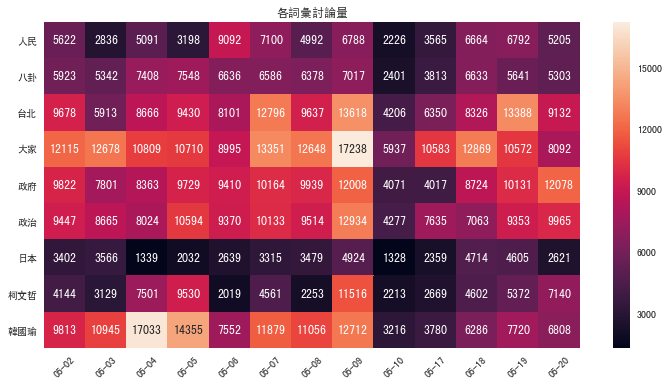

In [64]:
plt.figure(figsize=(12, 6))

data = data.astype(np.int64)
plot_heat_map(data, '各詞彙討論量')


In [65]:
r1 = data['柯文哲']# len comment
r2 = data['韓國瑜']

In [70]:
d1 = data['柯文哲']# lscore
d2 = data['韓國瑜']

k = d1/r1
h = d2/r2

-3.670050046974282


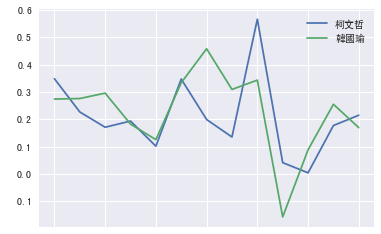

In [103]:
z = k.mean() - h.mean() / (np.sqrt((k.std() ** 2) / len(k) + (h.std() ** 2) / len(h)))

df = pd.DataFrame({'柯文哲':k, '韓國瑜':h})
df.plot()
# for x in ['柯文哲', '韓國瑜']:
#     sns.distplot(df[x], hist=False)
# df.columns = df.columns.astype('string')
# sns.distplot(h, hist=False)
print(z)

In [ ]:
pats = ['大家', '八卦', '政府', '台北', '韓國瑜', '政治', '柯文哲', '日本', '人民']

row = []
data = []
for i in range(2, 21):
    if i < 10:
        date = '05-0' + str(i)
    else:
        date = '05-' + str(i)
    row.append(date)
    sc = {}
    print(date)
    for j in range(len(hot)):
        if date in str(hot.iloc[j]['date']):
            for pat in pats:
                if pat in hot.iloc[j]['text']:
                    if pat in sc.keys():
                        sc[pat] += hot.iloc[j]['score']
                    else:
                        sc[pat] = hot.iloc[j]['score']

    data.append(sc)
data = pd.DataFrame(data, index = row)
data = data.dropna(axis=0)
data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
# print(score_piv_board['Gossiping'])
# fig = plt.figure()

# X = score_piv_board.index
# print(score_piv_board)
# plt.bar(np.arange(len(score_piv_board.index)), score_piv_board['Gossiping'], width=0.3, label='Gossiping', lw=1)
# plt.bar(np.arange(len(score_piv_board.index)) + 0.3, score_piv_board['WomenTalk'], width=0.3, label='WomenTalk')
# plt.bar(np.arange(len(score_piv_board.index)) + 0.6, score_piv_board['HatePolitics'], width=0.3, label='HatePolitics')

score_piv_board.plot(kind='bar')
# plt.xticks(range(len(score_piv_board.index)), score_piv_board.index, rotation=30)
# plt.title("title") 
# plt.xlabel("score")
# plt.ylabel("number")
# plt.legend(loc='upper left')
# fig.tight_layout()
# sns.barplot(x='score', y=score, hue='board', data=score_piv_board)
# sns.barplot(x=score_piv_board.index, y='Gossiping', data=score_piv_board)

In [ ]:
import jieba as jb
import jieba.posseg as pseg


# !cd statistics
# os.chdir('statistics')
jb.set_dictionary('./dict/dict.txt')
jb.load_userdict('./dict/ptt_dict.txt')
jb.enable_parallel(3)

STOP_WORD = set()
with open('./dict/ptt_stop_word.txt', 'r') as f:
    for line in f.readlines():
        STOP_WORD.add(line.strip())

com_text = ''
for it in total['comment']:
    for com in it:
        com_text += com['text']
total['cut_text'] = total['title'] + total['text'] + com_text
tmp = []
%timeit
for item in total['cut_text']:
    tmp.append([(w.word.strip(), w.flag.lower()) for w in pseg.cut(item) if w.word.strip() and w.word.strip() not in STOP_WORD])
total['cut_text'] = tmp

In [ ]:
print(STOP_WORD)
total['cut_text'].head()



In [ ]:
from gensim.corpora.dictionary import Dictionary

def get_dict(text):
    dic = dict()
    words = []
    for its in text:
        tmp = []
        for it in its:
            if it[0] in dic.keys():
                dic[it[0]].add(it[1].lower())
            else:
                dic[it[0]] = set(it[1].lower())
            tmp.append(it[0])
        words.append(tmp)
        
    word_dic = Dictionary(words)
    word_dic.filter_extremes(no_below=4)
    word_dic.filter_n_most_frequent(0)
    word_dic.compactify()
    return word_dic, {word_dic.token2id.get(w, -1): s for (w, s) in dic.items()}


mask = total['len_comment'] > 5
group = total[mask].groupby('board')
word_dic, sub_dic = get_dict(total['cut_text'])
tmp = []

for text in total['cut_text']:
    tmp.append([ word_dic.token2id.get(w[0], -1) for w in text])
total['id_text'] = tmp

In [ ]:

count = dict() # key: (total score, the number of articles)
for ind, row in group.get_group('WomenTalk')[['len_comment', 'id_text', 'score']].iterrows():
    for w in row['id_text']:
        if w in count.keys():
            count[w][0] += row['len_comment']
            count[w][1] += 1
#             count[w] = (count[w][0] + row['score'], count[w][1] + 1)
        else:
            count[w] = [row['len_comment'], 1]
count = {idx: c[0]/c[1] for (idx, c) in count.items()}
count = sorted(count.items(), key=lambda x: x[1], reverse=True)


In [ ]:
plt.figure(figsize=(12, 6))
ST = 2
END = 25
x = []
y = []
index = []
for idx, sc in count[ST:]:
    if 'n' in  sub_dic[idx] or 'N' in sub_dic[idx]:
        x.append(sc)
        y.append(word_dic.dfs[idx])
        index.append(idx)
        END -= 1
    if END == 0:
        break
print(index)
# for x in index:
#     print(word_dic.id2token[x])
df = pd.DataFrame({'len_comment': x, 'freq': y, 'idx': index})
sns.set()
pl = sns.regplot(x='len_comment', y='freq', data=df)

for line in range(df.shape[0]):
    pl.text(df.len_comment[line] + 0.2, df.freq[line], df.idx[line], horizontalalignment='center', size='small', color='black')

In [ ]:
for x in index:
    print(word_dic.id2token[x])
tmp = []
for i in range(len(word_dic)):
    tmp.append((word_dic[i], word_dic.dfs[i]))
# sorted(tmp, key=lambda x:x[1], reverse=True)

In [ ]:
word_dic[15]